In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("8-fraud_detection.csv")

In [4]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [5]:
df["is_fraud"].unique()

array([0, 1])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      10000 non-null  float64
 1   transaction_risk_score  10000 non-null  float64
 2   is_fraud                10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [7]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

<Axes: xlabel='transaction_amount', ylabel='transaction_risk_score'>

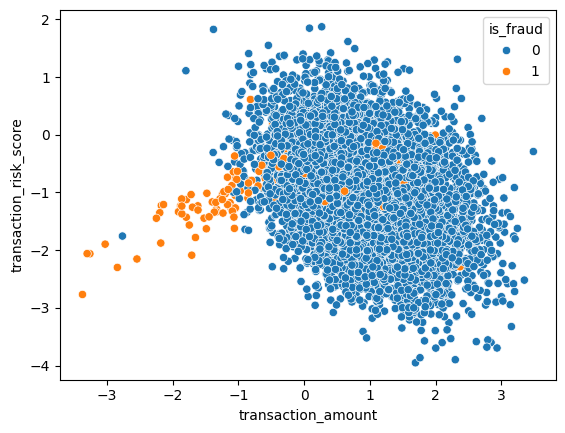

In [8]:
sns.scatterplot(x=X["transaction_amount"], y=X["transaction_risk_score"], hue=y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
penalty = ["l1", "l2","elasticnet"]
c_values = [100,10,1,0.1,0.01]
solver = ["newton-cg","lbfgs","liblinear","sag","saga","newton-cholesky"]
class_weight = [{0: w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
params = dict(penalty = penalty, C = c_values, solver = solver, class_weight = class_weight)

In [14]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [15]:
cv = StratifiedKFold()

In [16]:
grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv=cv)

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             scoring='accuracy')

In [19]:
y_pred = grid.predict(X_test)

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(2500,))

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
print(f"score: \n{accuracy_score(y_test, y_pred)}")
print(f"classifictaion report:\n{classification_report(y_test, y_pred)}")
print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

score: 
0.99
classifictaion report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2462
           1       0.84      0.42      0.56        38

    accuracy                           0.99      2500
   macro avg       0.92      0.71      0.78      2500
weighted avg       0.99      0.99      0.99      2500

confusion matrix:
[[2459    3]
 [  22   16]]


In [23]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score